In [17]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay
from datetime import datetime, timedelta


# quantity 1768.0000
# 4201.12
# -1,694.24
# first date 13/6/2015

[*********************100%***********************]  1 of 1 completed


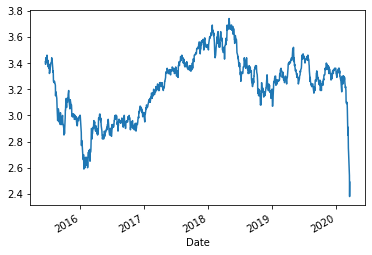

In [18]:
# Get the data for the stock by specifying the stock ticker, start date, and end date
start_date = datetime(2015, 6, 13)
end_date = datetime.today().date()
stock_ticker = "G3B.SI" #G3B.SI
amt_invested_per_month = 100
stock_data = yf.download(stock_ticker, start_date, end_date)
stock_data = stock_data[stock_data.index > start_date]

# Plot the close prices
stock_data.Close.plot()
plt.show()

In [19]:
# Get the data for dividends and store in a separate df
stock_div = yf.download(stock_ticker, start_date, end_date,
                      actions=True)
stock_div = stock_div[stock_div["Dividends"]>0]
stock_div = stock_div[stock_div.index > start_date]
stock_div


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-07-01,3.40,3.40,3.37,3.37,2.927660,163500,0.0482,0
2016-01-04,2.98,2.98,2.89,2.90,2.557890,80600,0.0452,0
2016-07-01,2.91,2.91,2.90,2.90,2.588278,11900,0.0344,0
2017-01-03,2.98,2.98,2.90,2.95,2.687001,45700,0.0604,0
2017-07-03,3.36,3.36,3.30,3.32,3.045075,208800,0.0231,0
2018-01-02,3.49,3.50,3.49,3.50,3.265142,35400,0.0596,0
2018-07-02,3.37,3.37,3.31,3.32,3.143636,81700,0.0502,0
2019-01-02,3.14,3.14,3.10,3.11,3.000774,47400,0.0597,0
2019-07-01,3.44,3.45,3.43,3.45,3.387777,103800,0.0602,0


In [20]:
# Create time series of dates that we purchased the stock
end_date2 = datetime(end_date.year, end_date.month + 1, end_date.day)
dti = pd.date_range(start=start_date, end=end_date2, freq='M')
dti += pd.Timedelta('15D')
dti -= pd.DateOffset(months=1)
dti = dti.map(lambda x : x + 0*BDay())
dti

DatetimeIndex(['2015-06-15', '2015-07-15', '2015-08-17', '2015-09-15',
               '2015-10-15', '2015-11-16', '2015-12-15', '2016-01-15',
               '2016-02-15', '2016-03-15', '2016-04-15', '2016-05-16',
               '2016-06-15', '2016-07-15', '2016-08-15', '2016-09-15',
               '2016-10-17', '2016-11-15', '2016-12-15', '2017-01-16',
               '2017-02-15', '2017-03-15', '2017-04-17', '2017-05-15',
               '2017-06-15', '2017-07-17', '2017-08-15', '2017-09-15',
               '2017-10-16', '2017-11-15', '2017-12-15', '2018-01-15',
               '2018-02-15', '2018-03-15', '2018-04-16', '2018-05-15',
               '2018-06-15', '2018-07-16', '2018-08-15', '2018-09-17',
               '2018-10-15', '2018-11-15', '2018-12-17', '2019-01-15',
               '2019-02-15', '2019-03-15', '2019-04-15', '2019-05-15',
               '2019-06-17', '2019-07-15', '2019-08-15', '2019-09-16',
               '2019-10-15', '2019-11-15', '2019-12-16', '2020-01-15',
      

In [21]:
dates_bought = stock_data[stock_data.index.isin(dti)]

dates_bought["avg_price"] = (dates_bought["Open"] + dates_bought["Close"]) / 2
dates_bought["units"] = amt_invested_per_month // dates_bought["avg_price"]
dates_bought["amt_bought"] = dates_bought["units"] * dates_bought["avg_price"]


dates_bought.loc[:,"cum_sum"] = dates_bought["amt_bought"].cumsum()
dates_bought.loc[:,"cum_units"] = dates_bought.loc[:,"units"].cumsum()
dates_bought 

c:\users\darren\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\darren\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\darren\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Open,High,Low,Close,Adj Close,Volume,avg_price,units,amt_bought,cum_sum,cum_units
Date,,,,,,,,,,,
2015-06-15,3.460,3.460,3.400,3.410,2.920658,263900,3.435,29.0,99.615002,99.615002,29.0
2015-07-15,3.390,3.390,3.380,3.390,2.945034,171400,3.390,29.0,98.310003,197.925005,58.0
2015-08-17,3.200,3.200,3.150,3.150,2.736536,37500,3.175,31.0,98.425002,296.350007,89.0
2015-09-15,2.950,2.950,2.930,2.930,2.545413,47200,2.940,34.0,99.960002,396.310009,123.0
2015-10-15,3.100,3.110,3.090,3.110,2.701786,6900,3.105,32.0,99.359997,495.670006,155.0
2015-11-16,3.000,3.000,2.980,2.990,2.597538,25300,2.995,33.0,98.835000,594.505006,188.0
2015-12-15,2.930,2.930,2.920,2.930,2.545413,11700,2.930,34.0,99.620002,694.125008,222.0
2016-01-15,2.720,2.720,2.690,2.690,2.372663,585500,2.705,36.0,97.380002,791.505010,258.0
2016-02-15,2.620,2.710,2.620,2.690,2.372663,920900,2.655,37.0,98.234999,889.740009,295.0


## Calculate dividends

In [22]:
for date in stock_div.index:
    print("Dividend for {}".format(date))
    div_amt = stock_div.at[date, "Dividends"]
    cum_units = dates_bought \
            .iloc[dates_bought.index.get_loc(date, method='ffill')] \
            .at["cum_units"]
    cum_sum = dates_bought \
            .iloc[dates_bought.index.get_loc(date, method='ffill')] \
            .at["cum_sum"]
    payout = cum_units * div_amt
    perc = payout / cum_sum * 100
    print("Cumulative units: {}  |  Div amount: {}  |  Payout: {:.2f}  |  %: {:.3f}".format(
        cum_units, div_amt, payout, perc
    ))
    stock_div.at[date, "payout"] = payout

stock_div.loc[:,"cum_div"] = stock_div["payout"].cumsum()
stock_div

Dividend for 2015-07-01 00:00:00
Cumulative units: 29.0  |  Div amount: 0.0482  |  Payout: 1.40  |  %: 1.403
Dividend for 2016-01-04 00:00:00
Cumulative units: 222.0  |  Div amount: 0.0452  |  Payout: 10.03  |  %: 1.446
Dividend for 2016-07-01 00:00:00
Cumulative units: 431.0  |  Div amount: 0.0344  |  Payout: 14.83  |  %: 1.155
Dividend for 2017-01-03 00:00:00
Cumulative units: 631.0  |  Div amount: 0.0604  |  Payout: 38.11  |  %: 2.034
Dividend for 2017-07-03 00:00:00
Cumulative units: 815.0  |  Div amount: 0.0231  |  Payout: 18.83  |  %: 0.764
Dividend for 2018-01-02 00:00:00
Cumulative units: 986.0  |  Div amount: 0.0596  |  Payout: 58.77  |  %: 1.924
Dividend for 2018-07-02 00:00:00
Cumulative units: 1122.0  |  Div amount: 0.0502  |  Payout: 56.32  |  %: 1.590
Dividend for 2019-01-02 00:00:00
Cumulative units: 1303.0  |  Div amount: 0.0597  |  Payout: 77.79  |  %: 1.883
Dividend for 2019-07-01 00:00:00
Cumulative units: 1480.0  |  Div amount: 0.0602  |  Payout: 89.10  |  %: 1.887


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,payout,cum_div
Date,,,,,,,,,,
2015-07-01,3.40,3.40,3.37,3.37,2.927660,163500,0.0482,0,1.3978,1.3978
2016-01-04,2.98,2.98,2.89,2.90,2.557890,80600,0.0452,0,10.0344,11.4322
2016-07-01,2.91,2.91,2.90,2.90,2.588278,11900,0.0344,0,14.8264,26.2586
2017-01-03,2.98,2.98,2.90,2.95,2.687001,45700,0.0604,0,38.1124,64.3710
2017-07-03,3.36,3.36,3.30,3.32,3.045075,208800,0.0231,0,18.8265,83.1975
2018-01-02,3.49,3.50,3.49,3.50,3.265142,35400,0.0596,0,58.7656,141.9631
2018-07-02,3.37,3.37,3.31,3.32,3.143636,81700,0.0502,0,56.3244,198.2875
2019-01-02,3.14,3.14,3.10,3.11,3.000774,47400,0.0597,0,77.7891,276.0766
2019-07-01,3.44,3.45,3.43,3.45,3.387777,103800,0.0602,0,89.0960,365.1726


## Plot cumulative portfolio returns

In [23]:
# date = datetime(2018, 1, 2)
# try:
#     today_price = stock_data.at[date, "Close"]
# except KeyError as e:
#     print("Error encountered while searching for today's price, likely no such day {}".format(e))

# print("Today's price: {}".format(today_price))
# retrieve_pf_value(date)
# print("Porfolio value: {}".format(pf_value))

In [24]:
def retrieve_pf_value(date):
    if date < dates_bought.index[0]:
        print("Date is before the first purchase date.")
        return 0
    else:
        try:
            curr_cum_units =  dates_bought.iloc[dates_bought.index.get_loc(date, method='ffill')].at["cum_units"]
            pf_value = today_price * curr_cum_units
            return pf_value
        except KeyError as e:
            print("Error encountered while retrieving pf value, likely out of bounds {}".format(e))
            return 0

In [25]:
stock_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-15,3.46,3.46,3.40,3.41,2.920658,263900
2015-06-16,3.41,3.41,3.39,3.39,2.903528,121600
2015-06-17,3.43,3.44,3.43,3.44,2.946353,7400
2015-06-18,3.43,3.43,3.41,3.41,2.920658,5000
2015-06-19,3.41,3.41,3.41,3.41,2.920658,4700


In [26]:
stock_div.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,payout,cum_div
Date,,,,,,,,,,
2015-07-01,3.40,3.40,3.37,3.37,2.927660,163500,0.0482,0,1.3978,1.3978
2016-01-04,2.98,2.98,2.89,2.90,2.557890,80600,0.0452,0,10.0344,11.4322
2016-07-01,2.91,2.91,2.90,2.90,2.588278,11900,0.0344,0,14.8264,26.2586
2017-01-03,2.98,2.98,2.90,2.95,2.687001,45700,0.0604,0,38.1124,64.3710
2017-07-03,3.36,3.36,3.30,3.32,3.045075,208800,0.0231,0,18.8265,83.1975


In [27]:
def retrieve_curr_cum_div(date):
    if date < stock_div.index[0]:
#         print("Hello!!")
        return 0
    else:
        try:
            curr_cum_div = stock_div.iloc[stock_div.index.get_loc(date, method='ffill')].at["cum_div"]
            return curr_cum_div
        except KeyError as e:
            print("Error encountered while searching for cumulative dividends, likely out of bounds {}".format(e))
            return 0

retrieve_curr_cum_div(date)
# print("Curr div: {}".format(curr_cum_div))

465.6474

In [28]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-15,3.46,3.46,3.40,3.41,2.920658,263900
2015-06-16,3.41,3.41,3.39,3.39,2.903528,121600
2015-06-17,3.43,3.44,3.43,3.44,2.946353,7400
2015-06-18,3.43,3.43,3.41,3.41,2.920658,5000
2015-06-19,3.41,3.41,3.41,3.41,2.920658,4700
...,...,...,...,...,...,...
2020-03-16,2.70,2.70,2.56,2.60,2.600000,727820
2020-03-17,2.58,2.59,2.52,2.54,2.540000,548950
2020-03-18,2.54,2.54,2.54,2.54,2.540000,0


In [35]:
dates_bought.head(100)

,Open,High,Low,Close,Adj Close,Volume,avg_price,units,amt_bought,cum_sum,cum_units
Date,,,,,,,,,,,
2015-06-15,3.460,3.460,3.400,3.410,2.920658,263900,3.435,29.0,99.615002,99.615002,29.0
2015-07-15,3.390,3.390,3.380,3.390,2.945034,171400,3.390,29.0,98.310003,197.925005,58.0
2015-08-17,3.200,3.200,3.150,3.150,2.736536,37500,3.175,31.0,98.425002,296.350007,89.0
2015-09-15,2.950,2.950,2.930,2.930,2.545413,47200,2.940,34.0,99.960002,396.310009,123.0
2015-10-15,3.100,3.110,3.090,3.110,2.701786,6900,3.105,32.0,99.359997,495.670006,155.0
2015-11-16,3.000,3.000,2.980,2.990,2.597538,25300,2.995,33.0,98.835000,594.505006,188.0
2015-12-15,2.930,2.930,2.920,2.930,2.545413,11700,2.930,34.0,99.620002,694.125008,222.0
2016-01-15,2.720,2.720,2.690,2.690,2.372663,585500,2.705,36.0,97.380002,791.505010,258.0
2016-02-15,2.620,2.710,2.620,2.690,2.372663,920900,2.655,37.0,98.234999,889.740009,295.0


Today's value: $4367.46
Today's price: $2.49
Total injections: $5604.70
Cumulative dividends: $465.65
Portfolio peak on 2020-01-20 with value: $5668.32
P/L: -22.075%  |  With dividends: -13.767%
% fall from peak: -22.950%  |  With dividends: -14.735%
Total units: 1754  |  Average price: $3.20


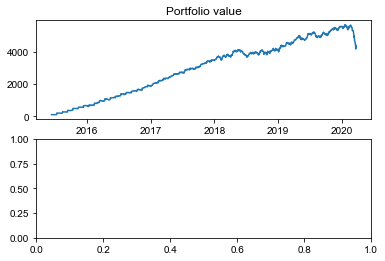

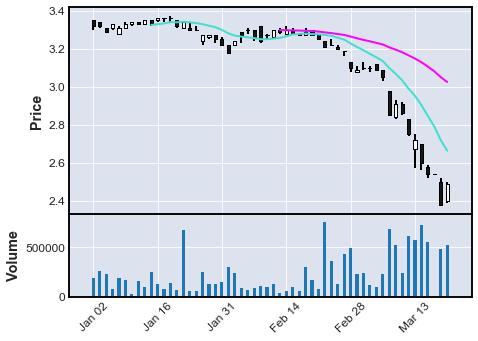

In [33]:
for date in stock_data.index:
#     print("Date: {}".format(date))
    
    try:
        today_price = stock_data.at[date, "Close"]
    except KeyError as e:
        print("Error encountered while searching for today's price, likely no such day {}".format(e))
    pf_value = retrieve_pf_value(date)
    stock_data.at[date, "pf_value"] = pf_value
else:
    max_rows = stock_data[stock_data['pf_value']==stock_data['pf_value'].max()]
    recent_max_row = max_rows.iloc[-1,:]
    peak_value_date = recent_max_row.name.date()
    peak_value = recent_max_row.pf_value
    latest_cum_div = retrieve_curr_cum_div(date)
    latest_cum_units = dates_bought.iloc[-1, :].cum_units
    total_injections = dates_bought.iloc[-1, :].cum_sum
    
    print("Today's value: ${:.2f}".format(pf_value))
    print("Today's price: ${:.2f}".format(stock_data.iloc[-1, :].Close))
    print("Total injections: ${:.2f}".format(total_injections))
    print("Cumulative dividends: ${:.2f}".format(latest_cum_div))
    print("Portfolio peak on {} with value: ${:.2f}".format(
        peak_value_date,
        peak_value
    ))
    print("P/L: {:.3f}%  |  With dividends: {:.3f}%".format(
        (pf_value - total_injections) / total_injections * 100,
        (pf_value - total_injections + latest_cum_div) / total_injections * 100
    ))
    print("% fall from peak: {:.3f}%  |  With dividends: {:.3f}%".format(
        (pf_value - peak_value) / peak_value * 100,
        (pf_value - peak_value + latest_cum_div) / peak_value * 100
    ))
    print("Total units: {}  |  Average price: ${:.2f}".format(
        int(latest_cum_units),
        total_injections / latest_cum_units
    ))
    

fig, axs = plt.subplots(2)
fig.suptitle('')
axs[0].plot(stock_data.pf_value, label='portfolio value')
axs[0].set_title("Portfolio value")
# axs[1].plot(stock_data.last('1Y').Close, label='stock prices')
mpf.plot(stock_data.last('1Y'), type='candle', mav=(10,30), volume=True)

# axs[1].set_title("Stock Price")  # Add a title to the axes.
axs[0].legend() 
# axs[1].legend()

# stock_data.pf_value.plot()
# start_window = stock_data.name.date() timedelta(days=-365)
# stock_data.last('1Y').pf_value.plot()


In [30]:
stock_data.tail(20)

,Open,High,Low,Close,Adj Close,Volume,pf_value
Date,,,,,,,
2020-02-24,3.24,3.24,3.21,3.21,3.21,759740,5511.570065
2020-02-25,3.22,3.25,3.22,3.22,3.22,358490,5528.740049
2020-02-26,3.21,3.22,3.20,3.20,3.20,130560,5494.400082
2020-02-27,3.19,3.19,3.16,3.19,3.19,430140,5477.230098
2020-02-28,3.13,3.13,3.08,3.10,3.10,496420,5322.699836
2020-03-02,3.08,3.11,3.07,3.09,3.09,233570,5305.529853
2020-03-03,3.10,3.13,3.09,3.10,3.10,242110,5322.699836
2020-03-04,3.10,3.11,3.08,3.10,3.10,116560,5322.699836
2020-03-05,3.12,3.12,3.09,3.09,3.09,103690,5305.529853


In [31]:
dates_bought.tail(10)

,Open,High,Low,Close,Adj Close,Volume,avg_price,units,amt_bought,cum_sum,cum_units
Date,,,,,,,,,,,
2019-06-17,3.35,3.36,3.34,3.36,3.241994,5900,3.355,29.0,97.294997,4720.707995,1480.0
2019-07-15,3.44,3.44,3.43,3.43,3.368138,7200,3.435,29.0,99.615002,4820.322997,1509.0
2019-08-15,3.21,3.22,3.20,3.22,3.161925,186100,3.215,31.0,99.665001,4919.987998,1540.0
2019-09-16,3.33,3.34,3.31,3.32,3.260121,173350,3.325,30.0,99.749998,5019.737996,1570.0
2019-10-15,3.24,3.25,3.23,3.23,3.171745,22470,3.235,30.0,97.050000,5116.787996,1600.0
2019-11-15,3.36,3.36,3.35,3.36,3.299400,10280,3.360,29.0,97.439997,5214.227993,1629.0
2019-12-16,3.35,3.35,3.33,3.33,3.269941,86940,3.340,29.0,96.859998,5311.087990,1658.0
2020-01-15,3.35,3.35,3.32,3.33,3.330000,253540,3.340,29.0,96.859998,5407.947988,1687.0
2020-02-17,3.30,3.31,3.28,3.28,3.280000,96850,3.290,30.0,98.699999,5506.647987,1717.0


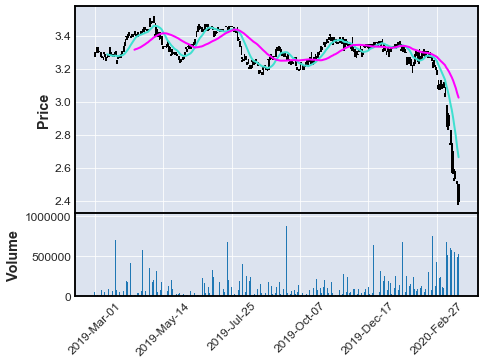

In [32]:
mpf.plot(stock_data["2019-03-01":],type='candle',mav=(10,30),volume=True)
